# Basic Statistis of Methylation datasets

This script aims to provide basic statistics of the methylation datasets. The script will provide statistics about the several features of the complete methylation, clocks and tissue datasets, including:

- Number of samples
- Number of CpG sites
- Tissues
- Species
- Age
- Sex

## 0. Loading the Data

In [12]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   
from matplotlib.colors import to_rgba
from math import ceil
import os

In [13]:
### LOAD: Full methylation dataset

complete_methylation_data = pd.read_csv('../GSE223748_datBetaNormalized.csv')

In [14]:
### Change Unnamed: 0 to CpG
complete_methylation_data.rename(columns={'Unnamed: 0': 'CpG'}, inplace=True)
complete_methylation_data.head()

,CpG,202897220093_R01C01,202897220093_R02C01,202897220093_R03C01,202897220093_R04C01,202897220093_R05C01,202897220093_R06C01,202897220093_R01C02,202897220093_R02C02,202897220093_R03C02,...,206139140103_R02C02,206139140103_R03C02,206139140103_R04C02,206139140103_R05C02,206139140103_R06C02,206139140104_R01C01,206139140104_R02C01,206139140104_R03C01,206139140104_R04C01,206139140104_R05C01
0,cg00000165,0.480990,0.483132,0.494042,0.505628,0.496484,0.486760,0.497341,0.482591,0.495475,...,0.140734,0.070563,0.060902,0.056785,0.054896,0.218780,0.141689,0.092939,0.085170,0.060552
1,cg00001209,0.934681,0.946624,0.940368,0.935963,0.926762,0.931264,0.941756,0.936942,0.940002,...,0.833588,0.872219,0.900707,0.929456,0.861758,0.828209,0.868502,0.825405,0.907443,0.909347
2,cg00001364,0.911639,0.907298,0.912401,0.901470,0.912350,0.910808,0.911290,0.910110,0.907811,...,0.808296,0.858634,0.840960,0.903902,0.914616,0.778192,0.805107,0.832695,0.889494,0.901459
3,cg00001582,0.060784,0.057917,0.055478,0.064311,0.060102,0.055498,0.056630,0.060347,0.066302,...,0.077506,0.087474,0.081258,0.067971,0.067423,0.069621,0.075440,0.065853,0.074909,0.074081
4,cg00002920,0.655778,0.628036,0.697029,0.690823,0.678101,0.615883,0.638421,0.641940,0.654358,...,0.719434,0.782699,0.701002,0.638727,0.755281,0.776376,0.799998,0.781141,0.698296,0.731993


In [8]:
#### LOAD: Metadata
metadata = pd.read_csv('../GSE223748_complete_metadata.csv')
# remove the X from the sample names
metadata['Sample'] = metadata['Sample'].str.replace('X', '')
metadata.head()

,SpeciesCommonName,SpeciesLatinName,Tissue,Sex,Age,Sample,GEO_ID
0,Olive baboon,Papio hamadryas,Cortex,Female,22.12,202794570001_R01C01,GSM6981727
1,Olive baboon,Papio hamadryas,Cortex,Male,8.04,202794570001_R01C02,GSM6981733
2,Olive baboon,Papio hamadryas,Cortex,Female,18.95,202794570001_R02C01,GSM6981728
3,Olive baboon,Papio hamadryas,Cortex,Male,18.64,202794570001_R02C02,GSM6981734
4,Olive baboon,Papio hamadryas,Cortex,Female,18.61,202794570001_R03C01,GSM6981729


In [247]:
#### LOAD: Methylation data for the complete CpGs of each clock

clock1 = pd.read_csv('../Clocks Methylation Data/Clock1_Methylation_data_complete.csv')
clock2 = pd.read_csv('../Clocks Methylation Data/Clock2_Methylation_data_complete.csv')
clock3 = pd.read_csv('../Clocks Methylation Data/Clock3_Methylation_data_complete.csv')
clock2_3 = pd.read_csv('../Clocks Methylation Data/Clock2_3_Overlap_Methylation_data_complete.csv')

clock1_human = pd.read_csv('../Clocks Methylation Data/Clock1_methylation_data_human.csv')
clock2_human = pd.read_csv('../Clocks Methylation Data/Clock2_Methylation_data_human.csv')
clock3_human = pd.read_csv('../Clocks Methylation Data/Clock3_Methylation_data_human.csv')
clock2_3_human = pd.read_csv('../Clocks Methylation Data/Clock2_3_Overlap_Methylation_data_human.csv')

In [9]:
#### LOAD: Tissue-specific methylation datasets from the saved CSV files

folder_name = "../Tissue Methylation"
tissue_files = os.listdir(folder_name) # Get a list of all files in the folder
tissues_df = metadata[['Sample', 'Tissue']]
tissues = tissues_df['Tissue'].unique() # Get a list of all tissues

# Load each CSV file into its own dataframe
for file in tissue_files:
    if file.endswith("_methylation_dataset.csv"):
        # Extract tissue name from file name
        tissue = file.split("_")[0]

        # Load CSV file into dataframe
        file_path = os.path.join(folder_name, file)
        globals()['{}_methylation_dataset'.format(tissue)] = pd.read_csv(file_path)

## 1. Complete Methylation Dataset

In [19]:
# Ensure that the sample IDs in metadata match the column names in methylation_data
common_samples = list(set(complete_methylation_data.columns).intersection(set(metadata['Sample'])))
common_samples
complete_methylation_data = complete_methylation_data[common_samples]
metadata = metadata[metadata['Sample'].isin(common_samples)].set_index('Sample')

In [17]:
### Basic Dataset Statistics

print("## Basic Dataset Statistics")
print(f"\nNumber of CpGs: {complete_methylation_data.shape[0]}")
print(f"Number of samples: {complete_methylation_data.shape[1]}")
print(f"Number of unique tissues: {metadata['Tissue'].nunique()}")
print(f"Number of species: {metadata['SpeciesLatinName'].nunique()}")
print(f'Number of species by common name: {metadata["SpeciesCommonName"].nunique()}')

## Basic Dataset Statistics

Number of CpGs: 37554
Number of samples: 15044
Number of unique tissues: 70
Number of species: 348
Number of species by common name: 348


In [18]:
# Missing values per metadata column

print("\n## Missing values per metadata column")
metadata.isnull().sum()


## Missing values per metadata column


SpeciesCommonName       0
SpeciesLatinName        0
Tissue                  0
Sex                   376
Age                  1713
Sample                  0
GEO_ID                  0
dtype: int64

In [20]:
# Find the min, max and mean of the methylation values
min_methylation = complete_methylation_data.min().min()
max_methylation = complete_methylation_data.max().max()
mean_methylation = complete_methylation_data.mean().mean()
print(f"Minimum methylation value: {min_methylation}")
print(f"Maximum methylation value: {max_methylation}")
print(f"Mean methylation value: {mean_methylation}")

Minimum methylation value: 0.0015797207107086
Maximum methylation value: 0.998582644390699
Mean methylation value: 0.5786473392540545


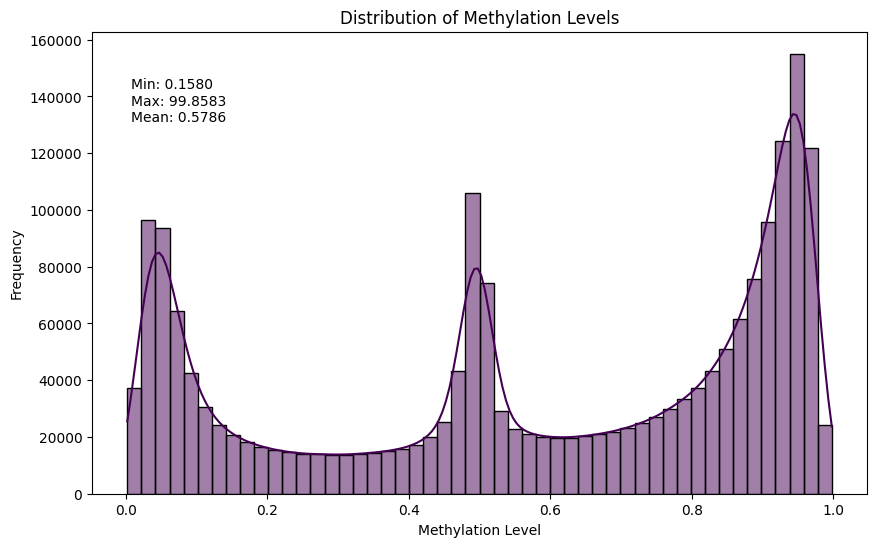

In [137]:
# Distribution of methylation levels (Sampled data)

# Sample a subset of the data for plotting
sample_size = 2_000_000  # 1 million data points - Adjust this number based on your available memory
sampled_data = complete_methylation_data.values.flatten()
if len(sampled_data) > sample_size:
    sampled_data = np.random.choice(sampled_data, sample_size, replace=False)

# Colors
colors = sns.color_palette("viridis", as_cmap=True)

# Distribution of methylation levels
plt.figure(figsize=(10, 6))
sns.histplot(sampled_data, bins=50, kde=True, color=colors(0))
plt.title("Distribution of Methylation Levels")
plt.xlabel("Methylation Level")
plt.ylabel("Frequency")
plt.text(0.05, 0.8, f"Min: {min_methylation:.4f}\nMax: {max_methylation*100:.4f}\nMean: {mean_methylation:.4f}", transform=plt.gca().transAxes, ha='left', va='bottom', fontsize=10)
plt.savefig("methylation_distribution.png")
plt.show()
plt.close()

#### 1.1. Tissues in the complete dataset

#### 1.2. Species

In [68]:
# Distribution of Samples Across Species
species_distribution = metadata['SpeciesLatinName'].value_counts()
print("\nDistribution of Samples Across Species:")
print(species_distribution)


Distribution of Samples Across Species:
SpeciesLatinName
Mus musculus              4011
Homo sapiens              1153
Canis lupus familiaris     759
Rattus norvegicus          619
Bos taurus                 465
                          ... 
Hystrix cristata             1
Balaenoptera musculus        1
Giraffa camelopardalis       1
Galeopterus variegatus       1
Phodopus roborovskii         1
Name: count, Length: 348, dtype: int64


In [ ]:
# Distribution of Samples Across Species - Plot

plt.figure(figsize=(15, 10))
sns.barplot(x='count', y='SpeciesLatinName', hue='SpeciesLatinName', data=species_distribution.reset_index(), palette='viridis')    
plt.title("Distribution of Samples Across Species")
plt.xlabel("Number of Samples")
plt.ylabel("Species")


#### 1.3. Age


Age Range of Samples: -0.75 - 139.0
Mean Age of Samples: 9.82
Number of samples with no age information: 1715


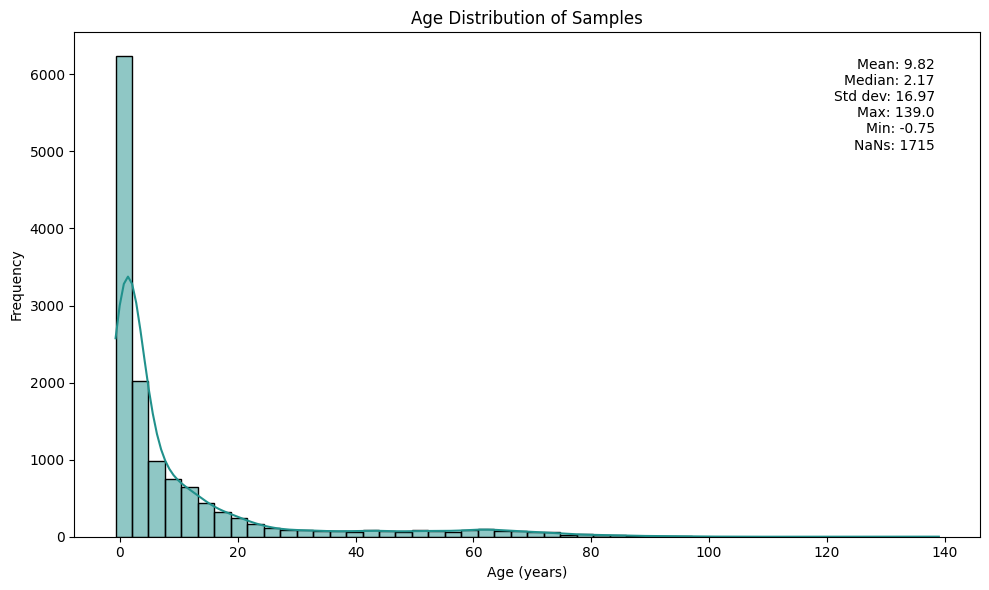

In [167]:
# Age Range of Samples

if 'Age' in metadata.columns:
    # Convert -1 to NaN
    metadata['Age'] = metadata['Age'].replace(-1, np.nan)
    
    # Calculate statistics excluding NaN values
    min_age = metadata['Age'].min()
    max_age = metadata['Age'].max()
    mean_age = metadata['Age'].mean()
    median_age = metadata['Age'].median()
    standard_deviation = metadata['Age'].std()
    no_age_samples = metadata['Age'].isnull().sum()
    
    print(f"\nAge Range of Samples: {min_age} - {max_age}")
    print(f"Mean Age of Samples: {mean_age:.2f}")
    print(f"Number of samples with no age information: {no_age_samples}")

    viridis = sns.color_palette("viridis", as_cmap=True)

    # Plot age distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(metadata['Age'].dropna(), bins=50, kde=True, color=viridis(0.5))
    plt.title("Age Distribution of Samples")
    plt.xlabel("Age (years)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.text(0.95, 0.95, f"Mean: {mean_age:.2f}\nMedian: {median_age:.2f}\nStd dev: {standard_deviation:.2f}\nMax: {max_age}\nMin: {min_age}\nNaNs: {no_age_samples}", transform=plt.gca().transAxes, ha='right', va='top',fontsize=10)
    # plt.text(0.95, 0.90, f"Max: {max_age}", transform=plt.gca().transAxes, ha='right', va='top', fontsize=10)
    # plt.text(0.95, 0.85, f"Min: {min_age}", transform=plt.gca().transAxes, ha='right', va='top', fontsize=10)
    # plt.text(0.95, 0.80, f"Samples with no age: {no_age_samples}", transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, fontstyle='italic')
    plt.savefig("age_distribution.png")
    plt.show()
    plt.close()


In [161]:
# check the percentage of sample with age below 20 years
age_below_20 = metadata[metadata['Age'] < 20].shape[0]
total_samples = metadata.shape[0]
percentage = (age_below_20 / total_samples) * 100
print(f"Percentage of samples with age below 20 years: {percentage:.2f}%")

Percentage of samples with age below 20 years: 76.44%


In [162]:
# print the percentiles
percentiles = [25, 50, 75]
age_percentiles = metadata['Age'].describe(percentiles=[p/100 for p in percentiles])
print("\nAge Percentiles:")
print(age_percentiles)



Age Percentiles:
count    13328.000000
mean         9.821810
std         16.974535
min         -0.750000
25%          0.649385
50%          2.166667
75%         10.500000
max        139.000000
Name: Age, dtype: float64


#### 1.4. Sex

Number of samples without sex information: 376
Proportion of Males: 0.455
Proportion of Females: 0.520
Proportion of Missing: 0.025


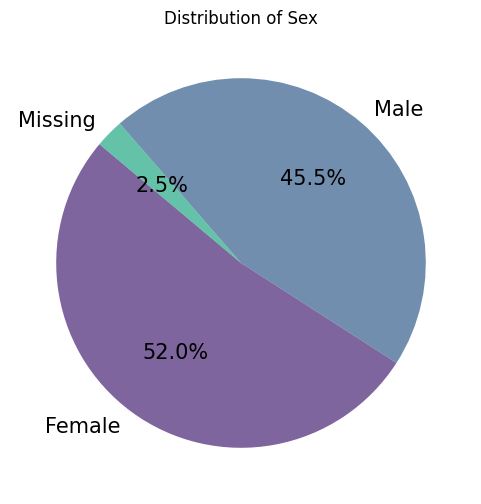

In [61]:
# Gender distribution

# Gender distribution
missing_data = metadata['Sex'].isnull().sum()
total_samples = len(metadata)

print(f"Number of samples without sex information: {missing_data}")
print(f"Proportion of Males: {metadata['Sex'].value_counts().get('Male', 0) / total_samples:.3f}")
print(f"Proportion of Females: {metadata['Sex'].value_counts().get('Female', 0) / total_samples:.3f}")
print(f"Proportion of Missing: {missing_data / total_samples:.3f}")

# Combine the counts of known and missing data
sex_counts = metadata['Sex'].value_counts()
sex_counts['Missing'] = missing_data

# Define the colors with alpha
colors = [to_rgba(c, alpha=0.7) for c in plt.cm.viridis([0.1, 0.3, 0.6])]

# Plot the distribution
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 15})
plt.title("Distribution of Sex")
plt.show()
plt.close()




Number of hypermethylated CpGs (>0.8): 9931
Number of hypomethylated CpGs (<0.2): 6041


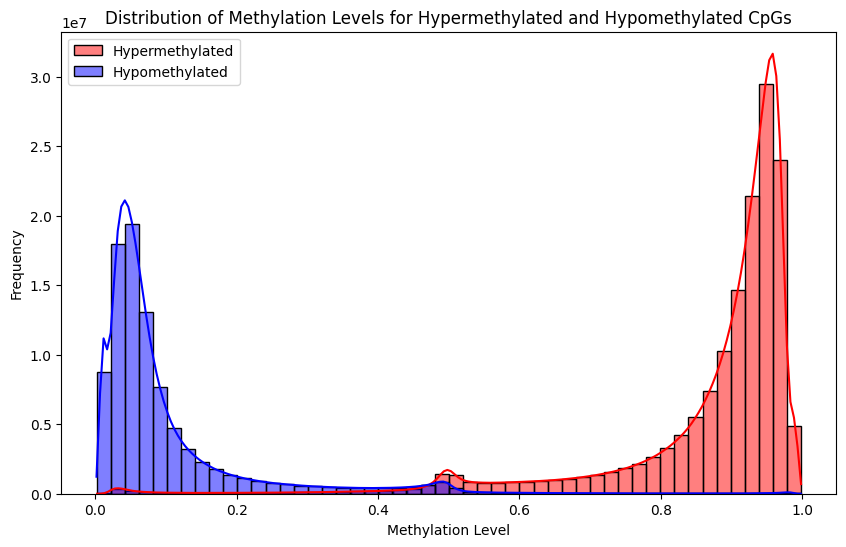

In [114]:
# Hypermethylated and Hypomethylated CpGs
hypermethylated = complete_methylation_data.index[complete_methylation_data.mean(axis=1) > 0.8].tolist()
hypomethylated = complete_methylation_data.index[complete_methylation_data.mean(axis=1) < 0.2].tolist()
print(f"\nNumber of hypermethylated CpGs (>0.8): {len(hypermethylated)}")
print(f"Number of hypomethylated CpGs (<0.2): {len(hypomethylated)}")

# Plot the distribution of methylation levels for hypermethylated and hypomethylated CpGs
plt.figure(figsize=(10, 6))
sns.histplot(complete_methylation_data.loc[hypermethylated].values.flatten(), bins=50, kde=True, color='red', label='Hypermethylated')
sns.histplot(complete_methylation_data.loc[hypomethylated].values.flatten(), bins=50, kde=True, color='blue', label='Hypomethylated')
plt.title("Distribution of Methylation Levels for Hypermethylated and Hypomethylated CpGs")
plt.xlabel("Methylation Level")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("methylation_distribution_hypo_hyper.png")
plt.show()
plt.close()

## 2. Clocks

In [248]:
# Summary of the number of CpGs in each clock

clocks = [clock1, clock2, clock3, clock2_3]

clock_cpg_counts = [len(clock) for clock in clocks]
clock_names = ['Clock1', 'Clock2', 'Clock3', 'Clock2_3']

clock_cpg_counts_human = [len(clock) for clock in [clock1_human, clock2_human, clock3_human, clock2_3_human]]
clock_names_human = ['Clock1', 'Clock2', 'Clock3', 'Clock2_3']

clock_summary = pd.DataFrame({'Clock': clock_names, 'CpG Count': clock_cpg_counts})
clock_summary_human = pd.DataFrame({'Clock': clock_names_human, 'CpG Count': clock_cpg_counts_human})

print("\nSummary of the number of CpGs in each clock:")
print(clock_summary)
print("\nSummary of the number of CpGs in each human clock:")
print(clock_summary_human)


Summary of the number of CpGs in each clock:
      Clock  CpG Count
0    Clock1        335
1    Clock2        816
2    Clock3        760
3  Clock2_3        401

Summary of the number of CpGs in each human clock:
      Clock  CpG Count
0    Clock1        335
1    Clock2        816
2    Clock3        760
3  Clock2_3        401


In [252]:
# Assuming your DataFrames are already created with 'CpG' as the index
# If not, you can set it as the index like this:
clock1 = clock1.set_index('CpG')
clock2 = clock2.set_index('CpG')
clock3 = clock3.set_index('CpG')
clock2_3 = clock2_3.set_index('CpG')

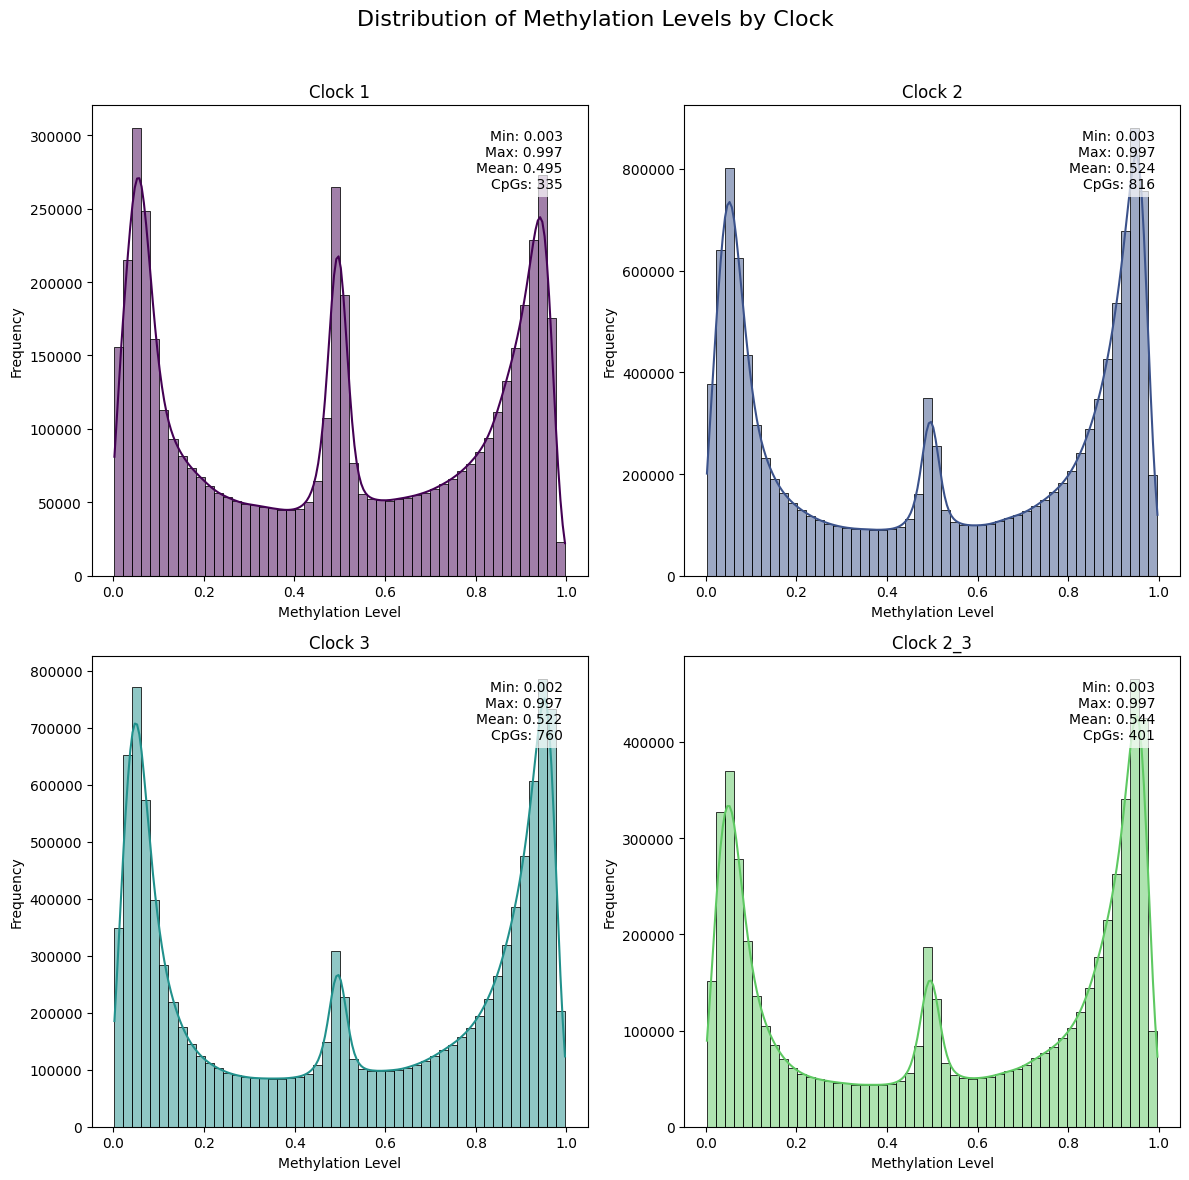

In [262]:
# Methylayion levels of CpGs in each clock

clocks = [clock1, clock2, clock3, clock2_3]
clock_names = ['Clock 1', 'Clock 2', 'Clock 3', 'Clock 2_3']

# # Load the viridis color palette
palette = sns.color_palette("viridis", as_cmap=True)

def plot_clock_methylation(clock_data, clock_name, ax):
    # Apply a different color of the viridis palette to each clock
    color = palette(clock_names.index(clock_name) / len(clock_names))

    cpgs = clock_data.shape[0]

    # Ensure we're working with numerical data
    data = clock_data.values.flatten().astype(float)

    sns.histplot(data, bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f"{clock_name}")
    ax.set_xlabel("Methylation Level")
    ax.set_ylabel("Frequency")
    
    # Calculate statistics
    min_val = np.min(data)
    max_val = np.max(data)
    mean_val = np.mean(data)
    
    # Add text with statistics
    stats_text = f"Min: {min_val:.3f}\nMax: {max_val:.3f}\nMean: {mean_val:.3f}\nCpGs: {cpgs}"
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Create the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Distribution of Methylation Levels by Clock", fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot the distribution for each clock
for i, (clock, clock_name) in enumerate(zip(clocks, clock_names)):
    plot_clock_methylation(clock, clock_name, axes[i])

# Remove extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to fit the suptitle
plt.savefig("methylation_distribution_by_clock.png", dpi=300, bbox_inches='tight')
plt.show()

In [258]:
# print mean, max, std deviation and N for each clock
clocks = [clock1, clock2, clock3, clock2_3]
clock_names = ['Clock 1', 'Clock 2', 'Clock 3', 'Clock 2_3']

for clock, clock_name in zip(clocks, clock_names):
    data = clock.values.flatten().astype(float)
    mean_val = np.mean(data)
    max_val = np.max(data)
    std_dev = np.std(data)
    cpgs = clock.shape[0]
    print(f"\n{clock_name}")
    print(f"Mean: {mean_val:.3f}")
    print(f"Max: {max_val:.3f}")
    print(f"Std Dev: {std_dev:.3f}")
    print(f"N: {cpgs}")




Clock 1
Mean: 0.495
Max: 0.997
Std Dev: 0.335
N: 335

Clock 2
Mean: 0.524
Max: 0.997
Std Dev: 0.361
N: 816

Clock 3
Mean: 0.522
Max: 0.997
Std Dev: 0.362
N: 760

Clock 2_3
Mean: 0.544
Max: 0.997
Std Dev: 0.359
N: 401


In [237]:
# Tissues in clock1 
clock1_tissues = metadata.loc[clock1.columns, 'Tissue'].unique()
print("\nTissues in Clock1:")
print(clock1_tissues)


Tissues in Clock1:
['Cerebellum' 'Cortex' 'Striatum' 'Blood' 'Liver' 'Muscle' 'Kidney'
 'Hippocampus' 'Tail' 'Fibroblast' 'Skin' 'Heart' 'Adipose' 'SVZ' 'Brain'
 'Lung' 'BoneMarrow' 'Spleen' 'LymphNode' 'Pituitary' 'iPSC' 'Ear'
 'Hypothalamus' 'Bladder' 'FrontalCortex' 'Ovaries' 'Ileum' 'Jejunum'
 'Larynx' 'SpinalCord' 'OccipitalCortex' 'MitralValve' 'ParietalCortex'
 'AdrenalCortex' 'Suspensory' 'Cartilage' 'Keratinocyte' 'Tendon'
 'Duodenum' 'TemporalCortex' 'Mammary' 'Lamina' 'Sacrocaudalis' 'Cecum'
 'Uterus' 'Testis' 'Thyroid' 'Pancreas' 'Blubber'
 'HematopoieticStem.Progenitor.LSK' 'Epidermis' 'Dermis'
 'MacrophageBoneMarrow' 'MacrophagePeritoneal' 'Aorta' 'Neocortex'
 'Substantia nigra' 'Oocyte' 'WholeBrain' 'Placenta' 'EndothelialCell'
 'ES' 'Fetus' 'Astrocyte' 'Maybe.Larynx' 'DifferentiatedBloodCells'
 'HematopoieticStemCells' 'Gut' 'Villi' 'Crypts']


In [240]:
# Tissues in Clock1 with more than 20 samples
clock1_tissues_100 = metadata.loc[clock1.columns, 'Tissue'].value_counts()
clock1_tissues_100 = clock1_tissues_100[clock1_tissues_100 > 100]
print("\nTissues in Clock1 with more than 100 samples:")
print(clock1_tissues_100)
len(clock1_tissues_100)



Tissues in Clock1 with more than 100 samples:
Tissue
Blood         4554
Skin          2754
Liver         2156
Ear            769
Cortex         714
Muscle         495
Heart          379
Cerebellum     367
Striatum       349
Kidney         327
Lung           272
Brain          246
Spleen         224
Fibroblast     213
Tail           199
Adipose        158
Name: count, dtype: int64


16

In [241]:
# Print the Tissue in each clock that have more than 200 samples
clock_tissues_200 = {}
for clock, clock_name in zip(clocks, clock_names):
    tissues = metadata.loc[clock.columns, 'Tissue'].value_counts()
    tissues = tissues[tissues > 200]
    clock_tissues_200[clock_name] = tissues.index.tolist()

print("\nTissues in each clock with more than 200 samples:")
for clock_name, tissues in clock_tissues_200.items():
    print(f"{clock_name}: {tissues}")



Tissues in each clock with more than 200 samples:
Clock 1: ['Blood', 'Skin', 'Liver', 'Ear', 'Cortex', 'Muscle', 'Heart', 'Cerebellum', 'Striatum', 'Kidney', 'Lung', 'Brain', 'Spleen', 'Fibroblast']
Clock 2: ['Blood', 'Skin', 'Liver', 'Ear', 'Cortex', 'Muscle', 'Heart', 'Cerebellum', 'Striatum', 'Kidney', 'Lung', 'Brain', 'Spleen', 'Fibroblast']
Clock 3: ['Blood', 'Skin', 'Liver', 'Ear', 'Cortex', 'Muscle', 'Heart', 'Cerebellum', 'Striatum', 'Kidney', 'Lung', 'Brain', 'Spleen', 'Fibroblast']
Clock 2_3: ['Blood', 'Skin', 'Liver', 'Ear', 'Cortex', 'Muscle', 'Heart', 'Cerebellum', 'Striatum', 'Kidney', 'Lung', 'Brain', 'Spleen', 'Fibroblast']


## 3. Tissues

In [26]:
### Mean, Max and Std deviation of methylation levels in each tissue

# Calculate the mean, max and standard deviation of methylation levels in each tissue
tissue_methylation_stats = complete_methylation_data.T.groupby(metadata['Tissue']).agg(['mean', 'max', 'std'])

# Print the first few rows
print("\nMean, Max and Std deviation of methylation levels in each tissue:")
tissue_methylation_stats.head()


Mean, Max and Std deviation of methylation levels in each tissue:


0                             1                          \
                   mean       max       std      mean       max       std   
Tissue                                                                      
Adipose        0.177095  0.522614  0.109465  0.815187  0.940427  0.079521   
AdrenalCortex  0.144709  0.165220  0.029007  0.857335  0.861268  0.005561   
Aorta          0.479182  0.500053  0.012342  0.742398  0.855116  0.067637   
Astrocyte      0.481337  0.486616  0.004984  0.887555  0.903978  0.010004   
Bladder        0.109347  0.173451  0.024690  0.769405  0.936051  0.095145   

                  2                             3      ...     37550  \
                   mean       max       std      mean  ...       std   
Tissue                                                 ...             
Adipose        0.833110  0.931678  0.102095  0.050581  ...  0.316292   
AdrenalCortex  0.939656  0.944492  0.006839  0.042658  ...  0.023118   
Aorta          0.819775  0.856277  0.024525  0.058031  ...  0.029230   
Astrocyte      0.892226  0.897055  0.004293  0.055950  ...  0.012977   
Bladder        0.896698  0.919065  0.022718  0.055499  ...  0.012565   

                  37551                         37552                      \
                   mean       max       std      mean       max       std   
Tissue                                                                      
Adipose        0.408023  0.985893  0.296197  0.484668  0.981589  0.217186   
AdrenalCortex  0.507807  0.509669  0.002632  0.479046  0.485907  0.009702   
Aorta          0.496445  0.513677  0.008379  0.499437  0.512075  0.009266   
Astrocyte      0.439518  0.480659  0.034378  0.506777  0.533924  0.013789   
Bladder        0.507380  0.526878  0.010662  0.516762  0.530398  0.008029   

                  37553                      
                   mean       max       std  
Tissue                                       
Adipose        0.574597  0.986632  0.239548  
AdrenalCortex  0.494118  0.494333  0.000303  
Aorta          0.501626  0.513550  0.007893  
Astrocyte      0.512158  0.524991  0.008394  
Bladder        0.501889  0.517869  0.009033  

[5 rows x 112662 columns]

In [23]:
# Deviation of Tissue Means from Overall Mean

# Calculate overall mean
overall_mean = mean_methylation

# Calculate mean for each tissue
tissue_means = {}
for tissue in metadata['Tissue'].unique():
    tissue_samples = metadata[metadata['Tissue'] == tissue].index
    tissue_data = complete_methylation_data[tissue_samples]
    tissue_means[tissue] = np.mean(tissue_data.values)

# Compare tissue means to overall mean
mean_differences = {}
for tissue, tissue_mean in tissue_means.items():
    difference = tissue_mean - overall_mean
    mean_differences[tissue] = difference

# Convert to DataFrame for easier viewing
df_differences = pd.DataFrame.from_dict(mean_differences, orient='index', columns=['Difference from Overall Mean'])
df_differences['Tissue Mean'] = pd.Series(tissue_means)
df_differences = df_differences.sort_values('Difference from Overall Mean', key=abs, ascending=False)

print(f"Overall mean methylation: {overall_mean:.4f}")

print(f"\nMaximum difference from overall mean: {df_differences.max()}")
print(f"\nMinimum difference from overall mean: {df_differences.min()}")

Overall mean methylation: 0.5786

Maximum difference from overall mean: Difference from Overall Mean    0.055501
Tissue Mean                     0.634149
dtype: float64

Minimum difference from overall mean: Difference from Overall Mean   -0.073513
Tissue Mean                     0.505134
dtype: float64


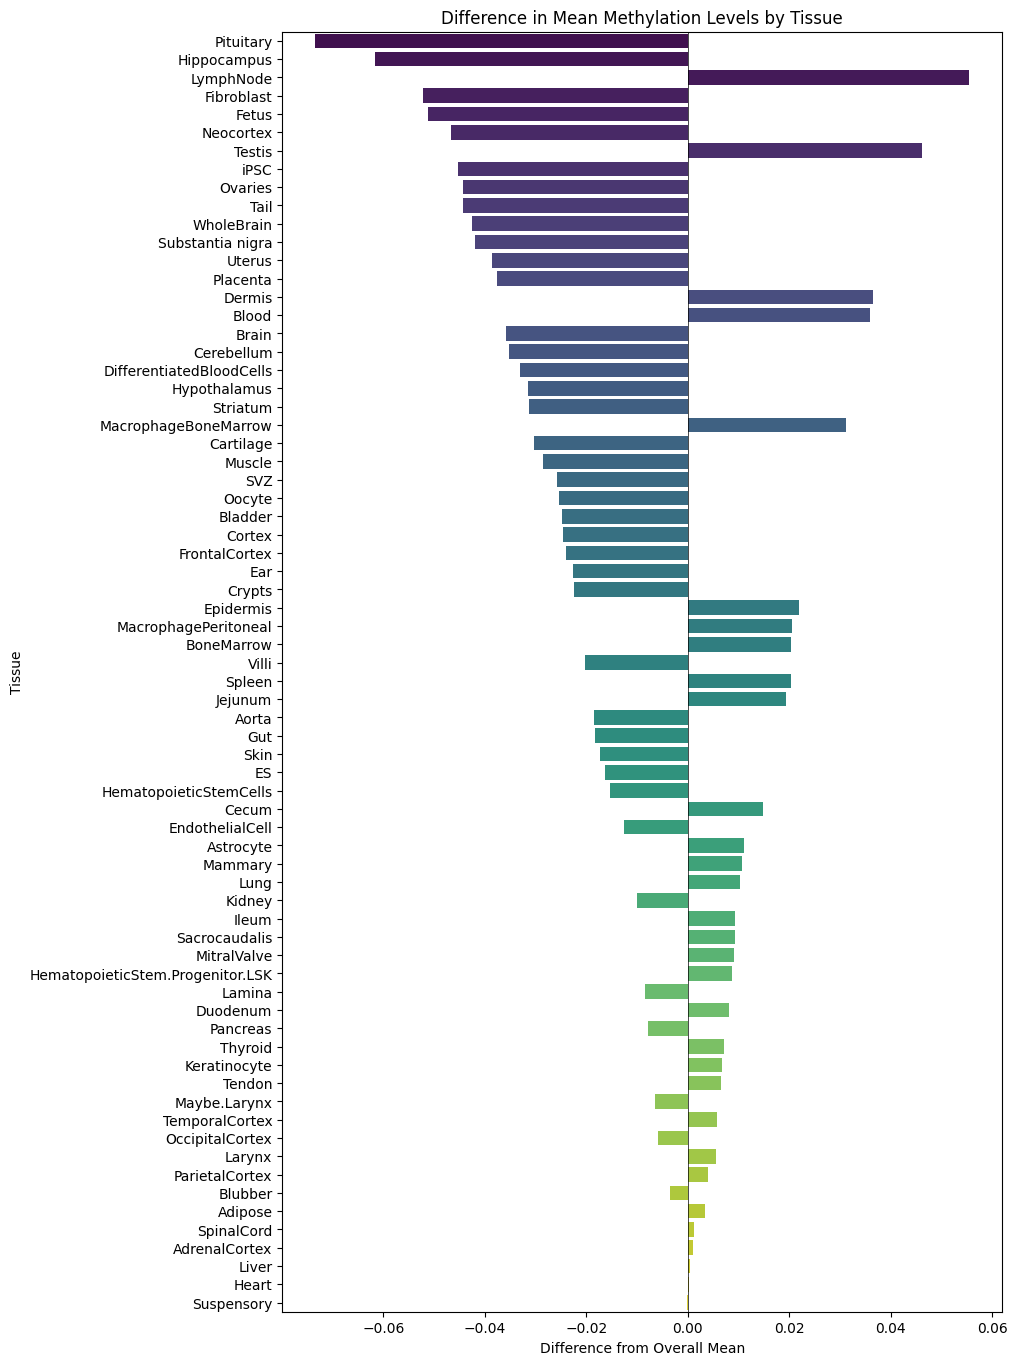

In [22]:
# Plot the differences

plt.figure(figsize=(12, 16))  # Increase the figure height significantly
sns.barplot(x='Difference from Overall Mean', y=df_differences.index, hue=df_differences.index, data=df_differences, palette='viridis')

plt.axvline(0, color='black', lw=0.5)
plt.title("Difference in Mean Methylation Levels by Tissue")
plt.xlabel("Difference from Overall Mean")
plt.ylabel("Tissue")

# Adjust the layout to add more space between the labels
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)

# Remove the legend to avoid clutter
plt.legend([],[], frameon=False)

plt.savefig("mean_methylation_differences.png")
plt.show()
plt.close()

In [ ]:
# ### Methylation levels by tissue (full figure)

# # Assuming complete_methylation_data and metadata are already loaded

# # Function to create a histogram for a single tissue
# def plot_tissue_histogram(tissue_data, tissue_name, ax, color):
#     sns.histplot(tissue_data, bins=50, kde=True, ax=ax, color=color)
#     ax.set_title(f"{tissue_name}")
#     ax.set_xlabel("Methylation Level")
#     ax.set_ylabel("Frequency")
    
#     # Calculate statistics
#     min_val = np.min(tissue_data)
#     max_val = np.max(tissue_data)
#     mean_val = np.mean(tissue_data)
#     N = len(tissue_data)
    
#     # Add text with statistics
#     stats_text = f"Min: {min_val:.3f}\nMax: {max_val:.3f}\nMean: {mean_val:.3f}\nN: {N}"
#     ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, 
#             verticalalignment='top', horizontalalignment='right',
#             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# # Get unique tissues
# unique_tissues = metadata['Tissue'].unique()
# n_tissues = len(unique_tissues)

# # Calculate grid dimensions
# n_cols = 4  # You can adjust this
# n_rows = ceil(n_tissues / n_cols)

# # Create figure
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
# fig.suptitle("Methylation Distribution by Tissue", fontsize=16)

# # Flatten axes array for easier indexing
# axes = axes.flatten()

# # Sample size for each tissue (adjust based on your memory constraints)
# sample_size = 100000 // n_tissues

# # Get the viridis color palette
# colors = sns.color_palette("viridis", n_tissues)

# # Plot histograms
# for i, (tissue, color) in enumerate(zip(unique_tissues, colors)):
#     tissue_samples = metadata[metadata['Tissue'] == tissue].index
#     tissue_data = complete_methylation_data[tissue_samples]
    
#     # Sample data if necessary
#     if tissue_data.size > sample_size:
#         flat_data = tissue_data.values.flatten()
#         sampled_data = np.random.choice(flat_data, sample_size, replace=False)
#     else:
#         sampled_data = tissue_data.values.flatten()
    
#     plot_tissue_histogram(sampled_data, tissue, axes[i], color)

# # Remove extra subplots
# for j in range(i+1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to fit the suptitle
# plt.savefig("methylation_distribution_by_tissue.png", dpi=300, bbox_inches='tight')
# plt.show()
# plt.close()

# print("Methylation distribution by tissue plot saved as 'methylation_distribution_by_tissue.png'")


In [ ]:
### Methylation levels by tissue (Split so that it fits the pages)

# Function to create a histogram for a single tissue
def plot_tissue_histogram(tissue_data, tissue_name, ax, color):
    sns.histplot(tissue_data, bins=50, kde=True, ax=ax, color=color)
    ax.set_title(f"{tissue_name}")
    ax.set_xlabel("Methylation Level")
    ax.set_ylabel("Frequency")
    
    # Calculate statistics
    min_val = np.min(tissue_data)
    max_val = np.max(tissue_data)
    mean_val = np.mean(tissue_data)
    N = len(tissue_data)
    
    # Add text with statistics
    stats_text = f"Min: {min_val:.3f}\nMax: {max_val:.3f}\nMean: {mean_val:.3f}\nN: {N}"
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, 
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Get unique tissues
unique_tissues = metadata['Tissue'].unique()
n_tissues = len(unique_tissues)

# Set parameters
n_cols = 3
rows_per_figure = 5
sample_size = 100000 // n_tissues

# Calculate total number of figures
total_figures = ceil(n_tissues / (n_cols * rows_per_figure))

# Get the viridis color palette
colors = sns.color_palette("viridis", n_tissues)

# Create figures
for start_idx in range(0, n_tissues, n_cols * rows_per_figure):
    end_idx = min(start_idx + n_cols * rows_per_figure, n_tissues)
    current_tissues = unique_tissues[start_idx:end_idx]
    n_current_tissues = len(current_tissues)
    
    n_rows = ceil(n_current_tissues / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

    figure_number = start_idx // (n_cols * rows_per_figure) + 1

    # Add suptitle
    fig.suptitle(f"Methylation Distribution by Tissue ({figure_number} of {total_figures})", fontsize=16)
    
    # Flatten axes array for easier indexing
    axes = axes.flatten()
    
    # Plot histograms
    for i, (tissue, color) in enumerate(zip(current_tissues, colors[start_idx:end_idx])):
        tissue_samples = metadata[metadata['Tissue'] == tissue].index
        tissue_data = complete_methylation_data[tissue_samples]
        
        # Sample data if necessary
        if tissue_data.size > sample_size:
            flat_data = tissue_data.values.flatten()
            sampled_data = np.random.choice(flat_data, sample_size, replace=False)
        else:
            sampled_data = tissue_data.values.flatten()
        
        plot_tissue_histogram(sampled_data, tissue, axes[i], color)
    
    # Remove extra subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to fit the suptitle
    
    # Save the figure
    figure_number = start_idx // (n_cols * rows_per_figure) + 1
    plt.savefig(f"methylation_distribution_by_tissue_{figure_number}.png", dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    print(f"Methylation distribution by tissue plot {figure_number} saved as 'methylation_distribution_by_tissue_{figure_number}.png'")

print("All methylation distribution by tissue plots have been saved.")

In [24]:
# Number of Samples Across Tissues - Summary

tissue_distribution = metadata['Tissue'].value_counts()
print("\nDistribution of Samples Across Tissues:")
print(tissue_distribution)


Distribution of Samples Across Tissues:
Tissue
Blood          4554
Skin           2754
Liver          2156
Ear             769
Cortex          714
               ... 
Larynx            2
MitralValve       2
Dermis            1
Thyroid           1
Testis            1
Name: count, Length: 70, dtype: int64


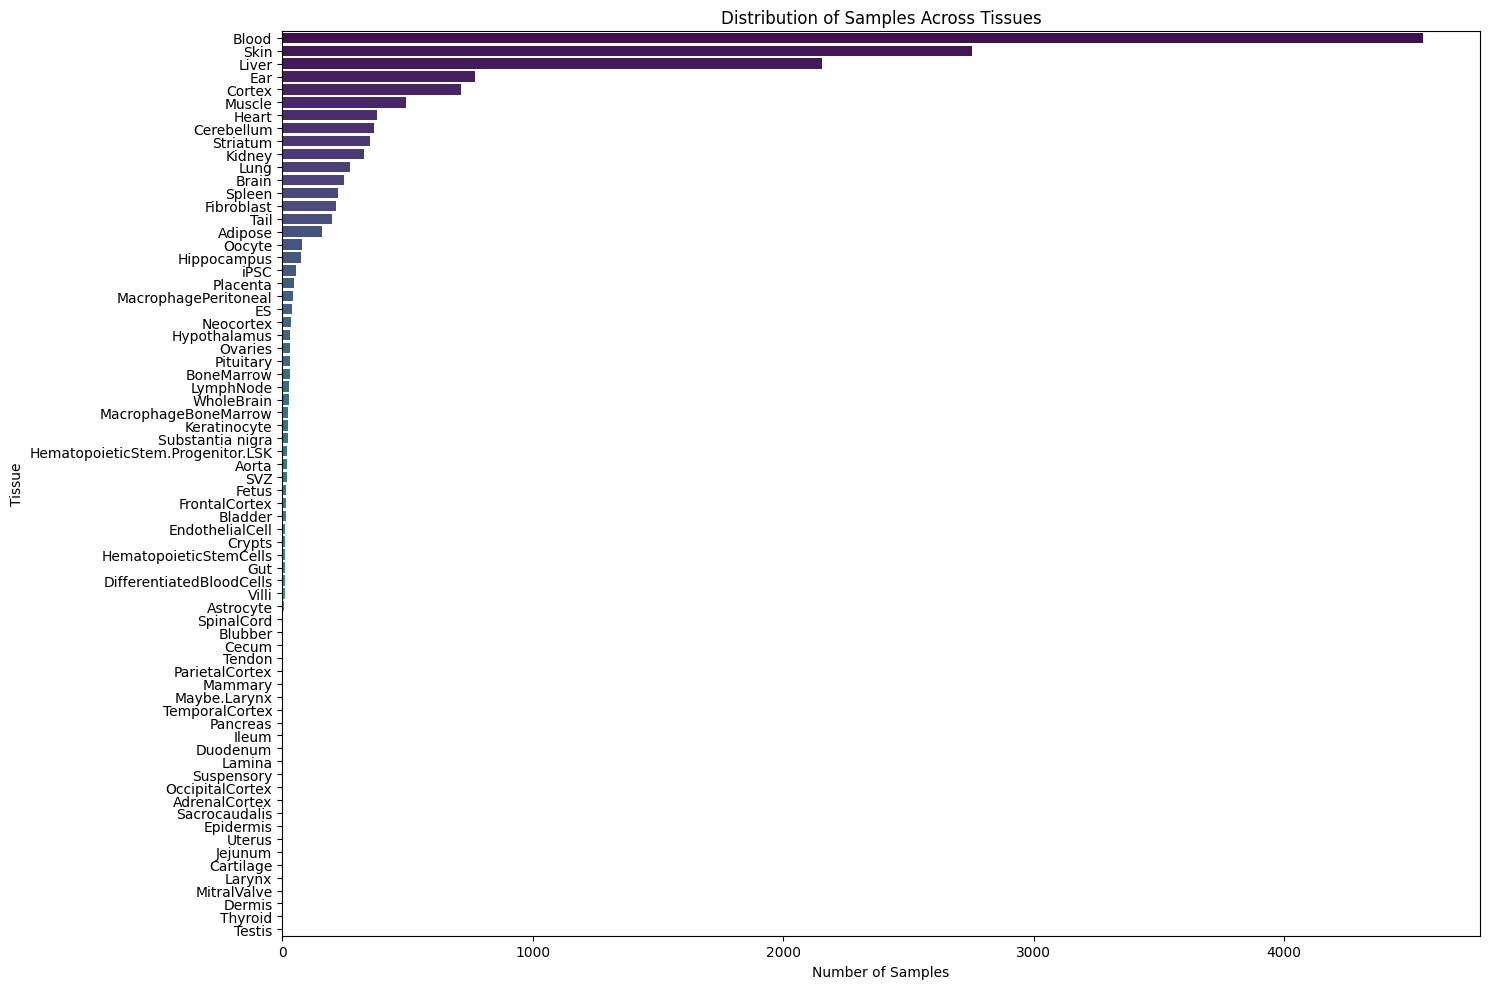

In [25]:
# Number of Samples Across Tissues - Plot

plt.figure(figsize=(15, 10))
sns.barplot(x='count', y='Tissue', hue='Tissue', data=tissue_distribution.reset_index(), palette='viridis')
plt.title("Distribution of Samples Across Tissues")
plt.xlabel("Number of Samples")
plt.ylabel("Tissue")

plt.tight_layout()
plt.savefig("samples_distribution_by_tissue.png", bbox_inches='tight')
plt.show()

In [34]:
tissues[1]

'Liver'

In [38]:
metadata.head()

,SpeciesCommonName,SpeciesLatinName,Tissue,Sex,Age,GEO_ID
Sample,,,,,,
202794570001_R01C01,Olive baboon,Papio hamadryas,Cortex,Female,22.12,GSM6981727
202794570001_R01C02,Olive baboon,Papio hamadryas,Cortex,Male,8.04,GSM6981733
202794570001_R02C01,Olive baboon,Papio hamadryas,Cortex,Female,18.95,GSM6981728
202794570001_R02C02,Olive baboon,Papio hamadryas,Cortex,Male,18.64,GSM6981734
202794570001_R03C01,Olive baboon,Papio hamadryas,Cortex,Female,18.61,GSM6981729


In [47]:
# Dataframe with Tissue name, Number of samples per tissue, Mean methylation of tissue (mean of all samples), Max methylation of tissue, Std deviation of methylation of tissue

import pandas as pd
import numpy as np

# Dataframe with Tissue name, Number of samples per tissue, Mean methylation of tissue (mean of all samples), Max methylation of tissue, Std deviation of methylation of tissue
tissue_summary_df = pd.DataFrame(columns=['Tissue', 'Number of Samples', 'Mean Methylation', 'Max Methylation', 'Min Methylation', 'Std Deviation'])

tissue_summaries = []

for tissue in metadata['Tissue'].unique():
    tissue_data = globals()[f'{tissue}_methylation_dataset']
    
    # Exclude the 'CpG' column
    methylation_values = tissue_data.drop(columns=['CpG']).values
    
    tissue_summaries.append({
        'Tissue': tissue,
        'Number of Samples': methylation_values.shape[1],  # Number of columns excluding 'CpG'
        'Mean Methylation': np.mean(methylation_values),
        'Max Methylation': np.max(methylation_values),
        'Min Methylation': np.min(methylation_values),
        'Std Deviation': np.std(methylation_values)
    })

tissue_summary_df = pd.concat([tissue_summary_df, pd.DataFrame(tissue_summaries)], ignore_index=True)

tissue_summary_df

C:\Users\Catia Antunes\AppData\Local\Temp\ipykernel_11780\1450983023.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tissue_summary_df = pd.concat([tissue_summary_df, pd.DataFrame(tissue_summaries)], ignore_index=True)


,Tissue,Number of Samples,Mean Methylation,Max Methylation,Min Methylation,Std Deviation
0,Cortex,714,0.554032,0.997392,0.002163,0.328213
1,Liver,2156,0.579009,0.998504,0.001974,0.329494
2,Blood,4554,0.614542,0.998583,0.001580,0.344882
3,Skin,2754,0.561288,0.998021,0.002287,0.333235
4,Muscle,495,0.550086,0.997322,0.002475,0.321254
5,Fibroblast,213,0.526397,0.997471,0.002762,0.323532
6,Striatum,349,0.547268,0.997379,0.003168,0.320397
7,Testis,1,0.624852,0.995780,0.004773,0.355648
8,Kidney,327,0.568720,0.998112,0.003028,0.330623
9,Spleen,224,0.598963,0.997753,0.003236,0.331923


In [49]:
colors = sns.color_palette("viridis", as_cmap=True)
viridis_colors = colors(range(5))




array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.26851 , 0.009605, 0.335427, 1.      ],
       [0.269944, 0.014625, 0.341379, 1.      ],
       [0.271305, 0.019942, 0.347269, 1.      ],
       [0.272594, 0.025563, 0.353093, 1.      ]])

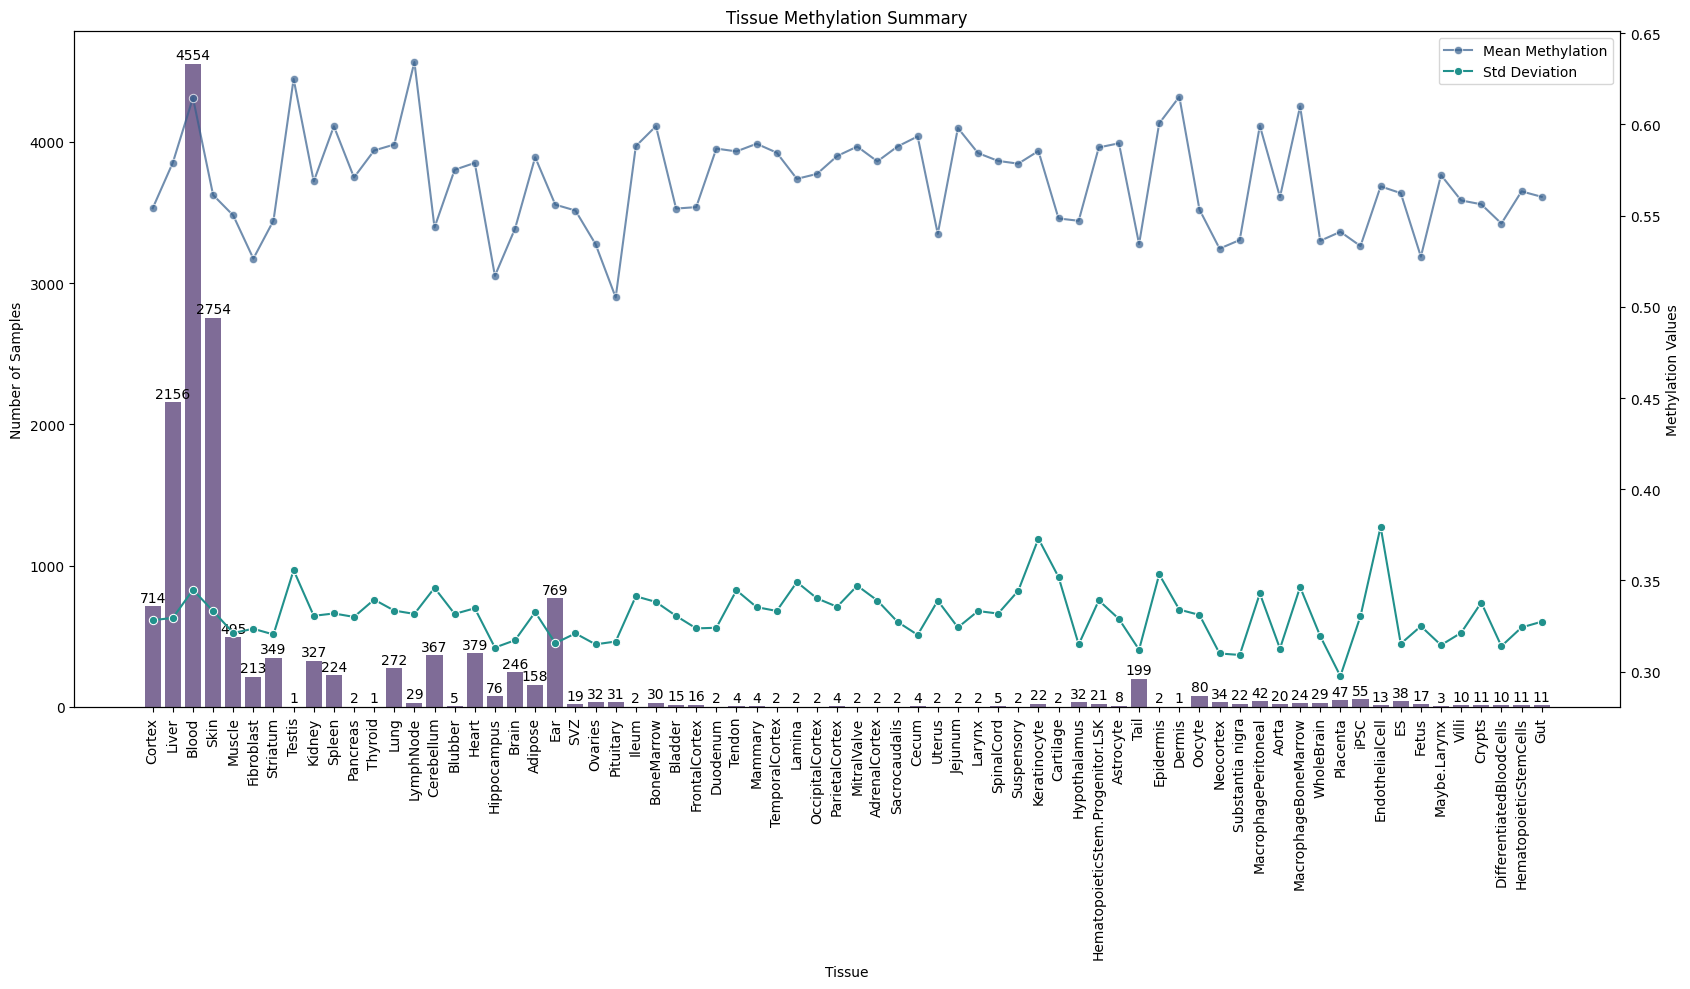

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming tissue_summary_df is already created as per your code

# set viridis color palette
colors = sns.color_palette("viridis", as_cmap=True)

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(17, 10))

# Bar plot for Number of Samples per Tissue
sns.barplot(x='Tissue', y='Number of Samples', data=tissue_summary_df, ax=ax1, color=colors(0.1), alpha=0.7)
# add number of samples on top of the bars
for i, v in enumerate(tissue_summary_df['Number of Samples']):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom')
ax1.set_ylabel('Number of Samples')
ax1.set_xlabel('Tissue')
ax1.set_title('Tissue Methylation Summary')
ax1.tick_params(axis='x', rotation=90)

# Create a second y-axis for the methylation statistics
ax2 = ax1.twinx()

# Plot Mean Methylation
sns.lineplot(x='Tissue', y='Mean Methylation', data=tissue_summary_df, ax=ax2, marker='o', label='Mean Methylation', color=colors(0.3), alpha=0.7)

# Plot Std Deviation
sns.lineplot(x='Tissue', y='Std Deviation', data=tissue_summary_df, ax=ax2, marker='o', label='Std Deviation', color=colors(0.5))

ax2.set_ylabel('Methylation Values')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

